# Analysis of the "SberAuto Subscription" Website

## 1.1. Project Description

**About SberAuto Subscription**

"SberAuto Subscription" is a long-term car rental service for individuals. Customers pay a fixed monthly fee and get a car for a period ranging from six months to three years. The payment also includes:

Insurance (comprehensive insurance, mandatory liability insurance, and extended liability insurance).
Seasonal tire changes and storage.
24/7 customer support.
For an additional fee, customers can purchase concierge services, which include:

Delivery of the car to and from the service center for maintenance.
Seasonal tire replacement.
Repairs.
"SberAuto Subscription" offers a new car ownership model for the Russian market, serving as an alternative to car loans. A car is an asset that depreciates quickly, so we recommend investing personal funds into financial instruments and using a car on a temporary basis for an affordable monthly fee.

## Project tasks

1. Conduct data exploration and cleaning.
2. Determine where the conversion rate is higher: organic or paid traffic.
3. Analyze which regions have a higher conversion rate: Moscow and St. Petersburg or other regions of Russia.

In [1]:
# Imports
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

### Datasets download

In [2]:
df_hits = pd.read_csv('ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [3]:
df_sessions = pd.read_csv('ga_sessions.csv')
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
# Sizes of datasets
print(df_hits.shape)
print(df_sessions.shape)

(15726470, 11)
(1860042, 18)


In [5]:
# Main datasets information 
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [6]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [7]:
# Persents of skiped values of datasets
def missing_values_check(data):    
    missing_values = data.isnull().sum()
    total_cells = np.product(data.shape)
    total_missing = missing_values.sum()
    missing_percentage = (total_missing / total_cells) * 100
    print(f"Missing persentage: {missing_percentage:.2f}%")
    
print(missing_values_check(df_hits))
print(missing_values_check(df_sessions))

Missing persentage: 20.19%
None
Missing persentage: 14.69%
None


In [8]:
# Unuque values
def nunique_for_columns(data):    
    for column_name in data.columns:
        unique_values = data[column_name].nunique()
        print(f"Unique values: {column_name}: {unique_values}")
nunique_for_columns(df_sessions)

Unique values: session_id: 1860042
Unique values: client_id: 1391717
Unique values: visit_date: 226
Unique values: visit_time: 85318
Unique values: visit_number: 537
Unique values: utm_source: 293
Unique values: utm_medium: 56
Unique values: utm_campaign: 412
Unique values: utm_adcontent: 286
Unique values: utm_keyword: 1219
Unique values: device_category: 3
Unique values: device_os: 13
Unique values: device_brand: 205
Unique values: device_model: 104
Unique values: device_screen_resolution: 5039
Unique values: device_browser: 57
Unique values: geo_country: 166
Unique values: geo_city: 2548


In [9]:
nunique_for_columns(df_hits)

Unique values: session_id: 1734610
Unique values: hit_date: 226
Unique values: hit_time: 925887
Unique values: hit_number: 500
Unique values: hit_type: 1
Unique values: hit_referer: 37873
Unique values: hit_page_path: 342715
Unique values: event_category: 52
Unique values: event_action: 230
Unique values: event_label: 39825
Unique values: event_value: 0


### Data cleaning

In [10]:
# Duplicates check:
df_sessions.duplicated().unique()

array([False])

In [11]:
df_hits.duplicated().unique()

array([False])

**Check and fill missing values**

In [12]:
# Persent of values features
missing_percentage = df_hits.isnull().mean() * 100
print(missing_percentage)

session_id          0.000000
hit_date            0.000000
hit_time           58.247795
hit_number          0.000000
hit_type            0.000000
hit_referer        39.899634
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
event_label        23.909905
event_value       100.000000
dtype: float64


In [13]:
missing_percentage = df_sessions.isnull().mean() * 100
print(missing_percentage)

session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.005215
utm_medium                   0.000000
utm_campaign                11.806346
utm_adcontent               18.043410
utm_keyword                 58.174009
device_category              0.000000
device_os                   57.533002
device_brand                19.740307
device_model                99.121633
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
dtype: float64


**Fill missing values in df_hits**

In [14]:
# We replace missing hit time values with the median. The median is not sensitive to outliers.
df_hits['hit_time'].fillna(df_hits['hit_time'].median(), inplace=True)

In [15]:
# Here's a function to fill missing values with the mode for categorical features:
def fill_missing_with_mode(df, columns):
    for column in columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    return df

In [16]:
# Here's a list of categorial features which have a missing values and we apply our function
columns_to_fill = ['hit_referer', 'event_label']
df_hits = fill_missing_with_mode(df_hits, columns_to_fill)

In [17]:
# Remove the empty column event_value
df_hits.drop(columns='event_value', inplace=True)

In [18]:
# Check the percentage of missing values after filling.
missing_percentage = df_hits.isnull().mean() * 100
print(missing_percentage)

session_id        0.0
hit_date          0.0
hit_time          0.0
hit_number        0.0
hit_type          0.0
hit_referer       0.0
hit_page_path     0.0
event_category    0.0
event_action      0.0
event_label       0.0
dtype: float64


**Fill missing values in df_sessions**

In [19]:
# Create a list of categorical features with missing values and apply the mode filling function to them.
columns_to_fill = ['utm_campaign', 'utm_source', 'utm_adcontent', 'utm_keyword', 'device_os', 'device_brand']
df_sessions = fill_missing_with_mode(df_sessions, columns_to_fill)

The column device_model has 99% missing values. We will remove this column.

In [20]:
df_sessions.drop(columns='device_model', inplace=True)

In [21]:
# Check the percentage of missing values after filling.
missing_percentage = df_sessions.isnull().mean() * 100
print(missing_percentage)

session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
utm_keyword                 0.0
device_category             0.0
device_os                   0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
dtype: float64


**Transformation of the hit_page_path column:**
The car model information is located after /cars/. Everything before /cars/ can be removed.
Additional URL parameters are not needed, so the ? sign and everything after it should also be removed.
All other links that do not contain the /cars/ section should be changed to the value other page – this includes the homepage and all other pages not related to a specific car model.

In [22]:
# Function for transforming the feature containing car information.
def extract_car_info(page_path):
    if 'cars' not in page_path:
        page_path = 'other page'
    else:
        page_path = page_path.split('cars')[-1]
    if 'all' in page_path:
        page_path = page_path.split('all')[-1]
    if '?' in page_path:
        page_path = page_path.split('?')[0]
    page_path = page_path.replace('/', ' ')
    if '&' in page_path:
        page_path = 'other page'
    return page_path

# Apply the function to the hit_page_path feature.
df_hits['car_info'] = df_hits['hit_page_path'].apply(extract_car_info)

df_hits.head(20)

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,car_info
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,KclpemfoHstknWHFiLit,
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,KclpemfoHstknWHFiLit,fiat
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,KclpemfoHstknWHFiLit,volkswagen polo e994838f
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,KclpemfoHstknWHFiLit,
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,KclpemfoHstknWHFiLit,mercedes-benz cla-klasse c917af36
5,6466333295973247896.1640246168.1640246168,2021-12-23,704194.0,41,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?utm_source_initial=youtube&u...,quiz,quiz_show,KclpemfoHstknWHFiLit,
6,281215510786615563.1640245516.1640245516,2021-12-23,911854.0,102,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/toyota?isnew=false&rental_ca...,quiz,quiz_show,KclpemfoHstknWHFiLit,toyota
7,4024492994895054107.1640269084.1640269084,2021-12-23,1071804.0,85,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,KclpemfoHstknWHFiLit,mercedes-benz glc f8f3304e
8,555009234841130092.1640256620.1640256620,2021-12-23,1013899.0,101,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,quiz_show,KclpemfoHstknWHFiLit,kia sorento c38179cb
9,2692901778487480807.1640206845.1640206845,2021-12-23,0.0,1,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/nissan/x-trail/0744675f?...,card_web,view_card,KclpemfoHstknWHFiLit,nissan x-trail 0744675f


In [23]:
df_hits['car_info'].value_counts()

car_info
                            4167123
other page                  3326476
 skoda rapid bf24b977        441084
 bf24b977                    427224
 lada-vaz vesta 2fc745ed     401246
                             ...   
 8016868f                         1
 70a37d9a                         1
 2eb8ab4d                         1
 opel meriva                      1
 dacia                            1
Name: count, Length: 2831, dtype: int64

It is evident that the car_info feature contains empty values, which are technically not NaN, but may be values with spaces that could have resulted from the transformation. We replace the space values with 'other page' and check the result.

In [24]:
df_hits['car_info'] = df_hits['car_info'].replace({'': 'other page', ' ': 'other page'})
df_hits['car_info'].value_counts()

car_info
other page                  7493637
 skoda rapid bf24b977        441084
 bf24b977                    427224
 lada-vaz vesta 2fc745ed     401246
 f28947a1                    377770
                             ...   
 peugeot expert                   1
 volvo v60-cross-country          1
 nissan cherokee                  1
 skoda 5-serii                    1
 dacia                            1
Name: count, Length: 2829, dtype: int64

In [25]:
# Drop 'hit_page_path' feature
df_hits.drop(columns='hit_page_path', inplace=True)

**Data typing**

Transform features of df_hits dataset in types:
hit_date - datetime  
hit_time - float  
hit_number - int 

In [26]:
df_hits['hit_date'] = pd.to_datetime(df_hits['hit_date'])
df_hits['hit_time'] = df_hits['hit_time'].astype(float)
df_hits['hit_number'] = df_hits['hit_number'].astype(int)

In [27]:
# Check the result:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   session_id      object        
 1   hit_date        datetime64[ns]
 2   hit_time        float64       
 3   hit_number      int32         
 4   hit_type        object        
 5   hit_referer     object        
 6   event_category  object        
 7   event_action    object        
 8   event_label     object        
 9   car_info        object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 1.1+ GB


Transform features of df_sessions dataset in types: hit_date - datetime
visit_date - datetime  
visit_time - datetime.time

In [28]:
df_sessions['visit_date'] = pd.to_datetime(df_sessions['visit_date'])
df_sessions = df_sessions.copy()
df_sessions['visit_time'] = pd.to_datetime(df_sessions['visit_time'], format='%H:%M:%S')

In [29]:
# Check the result:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 17 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   client_id                 object        
 2   visit_date                datetime64[ns]
 3   visit_time                datetime64[ns]
 4   visit_number              int64         
 5   utm_source                object        
 6   utm_medium                object        
 7   utm_campaign              object        
 8   utm_adcontent             object        
 9   utm_keyword               object        
 10  device_category           object        
 11  device_os                 object        
 12  device_brand              object        
 13  device_screen_resolution  object        
 14  device_browser            object        
 15  geo_country               object        
 16  geo_city                  object        
dtypes: datet

##  Solution to the data analysis task

To solve the data analysis task, it is necessary to perform preliminary data preparation steps, namely:

1. Merge the data by the session_id feature to obtain information on conversions by traffic sources and other segments.  
2. Generate a feature with the conversion rate. Where a target action was completed, the conversion is 100%. Where no action was completed, the conversion is 0%.  
3. Generate a "channel" feature with values "organic" and "paid".  
4. Generate a feature for the cities of presence with values "city of presence" and "other".  
5. Generate a feature for social networks with values: "social networks" and "other".  

The provided datasets have a common feature: session_id. These datasets should be merged based on this feature for further analysis.

In [30]:
# Check the original sizes of the datasets.
df_hits.shape

(15726470, 10)

In [31]:
df_sessions.shape

(1860042, 17)

In [32]:
# Merge datasets on feature session_id:
merged_dataset = pd.merge(df_hits, df_sessions, on='session_id')
print(f"Size of total dataset: {merged_dataset.shape[0]} строк")
print(f"Lost data of original size df_hits: {(df_hits.shape[0] - merged_dataset.shape[0]) /df_hits.shape[0] *100 } %")

Size of total dataset: 15685219 строк
Lost data of original size df_hits: 0.26230298344129355 %


Data loss during the merging of datasets is insignificant and will not affect the final result.

In [33]:
merged_dataset.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,event_category,event_action,event_label,car_info,...,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,HbolMJUevblAbkHClEQa,quiz,quiz_show,KclpemfoHstknWHFiLit,other page,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,360x780,Chrome,Russia,Saint Petersburg
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,HbolMJUevblAbkHClEQa,quiz,quiz_show,KclpemfoHstknWHFiLit,fiat,...,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,HbolMJUevblAbkHClEQa,quiz,quiz_show,KclpemfoHstknWHFiLit,volkswagen polo e994838f,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,JajANoFxoqXfKRNBUhzx,desktop,Windows,Apple,2560x1080,Chrome,Russia,Moscow
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,HbolMJUevblAbkHClEQa,quiz,quiz_show,KclpemfoHstknWHFiLit,other page,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,zXjuoqEaPElBnwpSHMpx,mobile,Android,Samsung,412x915,Chrome,Russia,Podolsk
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,HbolMJUevblAbkHClEQa,quiz,quiz_show,KclpemfoHstknWHFiLit,mercedes-benz cla-klasse c917af36,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,Apple,1536x864,Chrome,Estonia,Tallinn


**Generation of an additional feature with the conversion rate:**  
According to the Glossary, target actions should be considered a specific set of event_action values. A target action is considered to have occurred if one of these events is recorded.
We generate the conversion_rate feature:

In [34]:
# The list of target actions, taken from the description:
event_action_list =  ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 
                      'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click', 
                      'sub_submit_success', 'sub_car_request_submit_click']

In [35]:
merged_dataset['conversion_rate'] = 0
merged_dataset.loc[merged_dataset['event_action'].isin(event_action_list), 'conversion_rate'] = 100

In [36]:
utm_medium_organic_list = ['organic', 'referral', '(none)']
merged_dataset['channel'] = 'paid'
merged_dataset.loc[merged_dataset['utm_medium'].isin(utm_medium_organic_list), 'channel'] = 'organic'

**Generation of an additional feature with cities of presence:**  
It is necessary to create a city_presence feature, which will contain two values: city of presence - mskreg_spb and other cities - others.  
To sort this feature, I created a list of cities, which includes Moscow, St. Petersburg, and cities from the Moscow region found in the geo_city feature.

In [37]:
presence_list = ['Saint Petersburg', 'Moscow', 'Podolsk', 'Korolyov', 'Kolomna', 'Naro-Fominsk', 'Dzerzhinsky',
                 'Krasnoznamensk', 'Krasnogorsk', 'Balashikha', 'Sergiyev Posad', 'Dmitrov', 'Odintsovo', 'Lobnya',
                 'Kotelniki', 'Mytishchi', 'Zheleznodorozhny', 'Shchyolkovo', 'Vidnoye', 'Khimki', 'Lyubertsy',
                 'Domodedovo', 'Staraya Kupavna', 'Lytkarino', 'Klin', 'Pushkino', 'Nakhabino', 'Ramenskoye', 
                 'Solnechnogorsk', 'Ivanteyevka', 'Aprelevka', 'Elektrostal', 'Lukhovitsy', 'Pavlovsky Posad',
                 'Chernogolovka', 'Zhukovskiy', 'Istra', 'Tomilino', 'Ruza', 'Krasnoarmeysk', 'Voskresensk',
                 'Zvenigorod', 'Dolgoprudny', 'Stupino', 'Reutov', 'Orekhovo-Zuyevo', 'Fryazino', 'Losino-Petrovsky',
                 'Chekhov', 'Selyatino', 'Volokolamsk', 'Dzerzhinsk', 'Protvino', 'Shatura', 'Elektrougli']

In [38]:
merged_dataset['city_presence'] = 'others'
merged_dataset.loc[merged_dataset['geo_city'].isin(presence_list), 'city_presence'] = 'mskreg_spb'

**Generation of an additional feature for social networks:**  
The task is to assess the potential of social networks for further scaling of advertising.  
To determine what in the data relates to social networks and what does not, we will create a social feature, which will contain two values: social_net and others.

In [39]:
# The list of utm_source values that relate to social networks (taken from the description):
utm_sourse_social_list = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 
                          'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

In [40]:
merged_dataset['social'] = 'others'
merged_dataset.loc[merged_dataset['utm_source'].isin(utm_sourse_social_list), 'social'] = 'social_net'

### Hypothesis testing: Organic traffic is not different from paid traffic in terms of CR (Conversion Rate) for target events.

**Hypothesis testing using a Z-test**

In [41]:
# Group the data by traffic type and calculate the average values of Conversion Rate.
grouped_df = merged_dataset.groupby('channel')['conversion_rate'].mean()

# Calculate the Conversion Rate for organic and paid traffic.
organic_cr = grouped_df['organic']
paid_cr = grouped_df['paid']

# Calculate the sample sizes for each group.
n_organic = merged_dataset['channel'].value_counts()['organic']
n_paid = merged_dataset['channel'].value_counts()['paid']

# Calculate the standard errors for each group.
se_organic = (organic_cr * (1 - organic_cr) / n_organic) ** 0.5
se_paid = (paid_cr * (1 - paid_cr) / n_paid) ** 0.5

# Calculate the Z-value for the difference between proportions.
z_value = (organic_cr - paid_cr) / ((se_organic ** 2 + se_paid ** 2) ** 0.5)

# Set the significance level.
alpha = 0.05

# Calculate the critical Z-value for the given significance level.
z_critical = st.norm.ppf(1 - alpha / 2)

# Check the statistical significance of the difference between proportions.
if abs(z_value) > z_critical:
    print("The difference in Conversion Rate between organic and paid traffic is statistically significant.")
else:
    print("The difference in Conversion Rate between organic and paid traffic is not statistically significant.")

The difference in Conversion Rate between organic and paid traffic is statistically significant.


**Hypothesis testing using the Chi-square method**

In [42]:
# Create a contingency table for organic and paid traffic
contingency_table = pd.crosstab(merged_dataset['channel'], merged_dataset['conversion_rate'])

# Calculate the Chi-square statistic and p-value.
chi2, p_value, _, _ = st.chi2_contingency(contingency_table)

# Check the statistical significance of the differences between the groups.
if p_value < alpha:
    print("The difference in Conversion Rate between organic and paid traffic is statistically significant.")
else:
    print("The difference in Conversion Rate between organic and paid traffic is not statistically significant.")

The difference in Conversion Rate between organic and paid traffic is statistically significant.


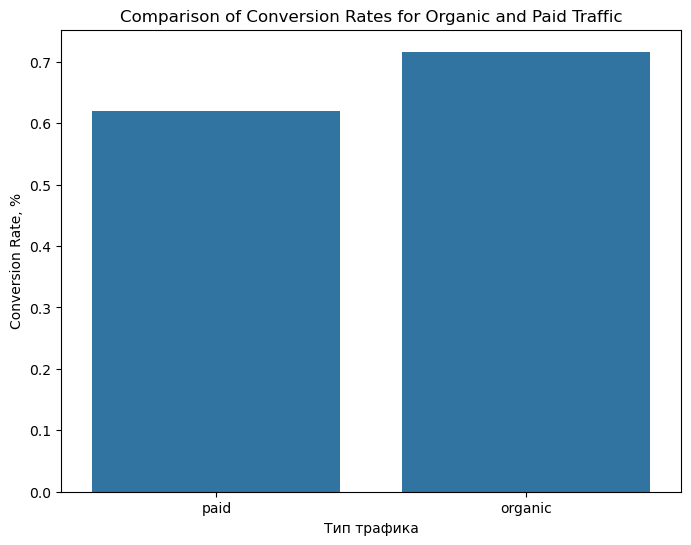

In [43]:
# Visualization of the conversion rate for organic and paid traffic.
plt.figure(figsize=(8, 6))
sns.barplot(x='channel', y='conversion_rate', data=merged_dataset, ci=None)
plt.xlabel('Тип трафика')
plt.ylabel('Conversion Rate, %')
plt.title('Comparison of Conversion Rates for Organic and Paid Traffic')
plt.show()

### Hypothesis testing: Traffic from mobile devices is not different from traffic from desktop devices in terms of CR (Conversion Rate) for target events

**Hypothesis testing using a Z-test**

In [44]:
# Group the data by device type and calculate the average Conversion Rate.
grouped_df = merged_dataset.groupby('device_category')['conversion_rate'].mean()

# Calculate the Conversion Rate for mobile and desktop devices.
mobile_cr = grouped_df['mobile']
desktop_cr = grouped_df['desktop']

# Calculate the sample sizes for each group.
n_mobile = merged_dataset['device_category'].value_counts()['mobile']
n_desktop = merged_dataset['device_category'].value_counts()['desktop']

# Calculate the standard errors for each group.
se_mobile = (mobile_cr * (1 - mobile_cr) / n_mobile) ** 0.5
se_desktop = (desktop_cr * (1 - desktop_cr) / n_desktop) ** 0.5

# Calculate the Z-value for the difference between proportions.
z_value = (mobile_cr - desktop_cr) / ((se_mobile ** 2 + se_desktop ** 2) ** 0.5)

# Check the statistical significance of the differences between proportions.
if abs(z_value) > z_critical:
    print("The difference in Conversion Rates between mobile and desktop devices is statistically significant.")
else:
    print("The difference in Conversion Rates between mobile and desktop devices is not statistically significant.")

The difference in Conversion Rates between mobile and desktop devices is statistically significant.


**Hypothesis testing using the Chi-square method.**

In [45]:
# Filter the data, keeping only mobile and desktop devices.
filtered_data = merged_dataset[(merged_dataset['device_category'] == 'mobile') | (merged_dataset['device_category'] == 'desktop')]

# Calculate the Chi-square statistic and p-value directly without creating a separate contingency table.
chi2, p_value, _, _ = st.chi2_contingency(pd.crosstab(filtered_data['device_category'], \
                                                      filtered_data['conversion_rate'], margins=False))

# Check the statistical significance of the differences between the groups.
if p_value < alpha:
    print("The difference in Conversion Rates between mobile and desktop devices is statistically significant.")
else:
    print("The difference in Conversion Rates between mobile and desktop devices is not statistically significant.")

The difference in Conversion Rates between mobile and desktop devices is statistically significant.


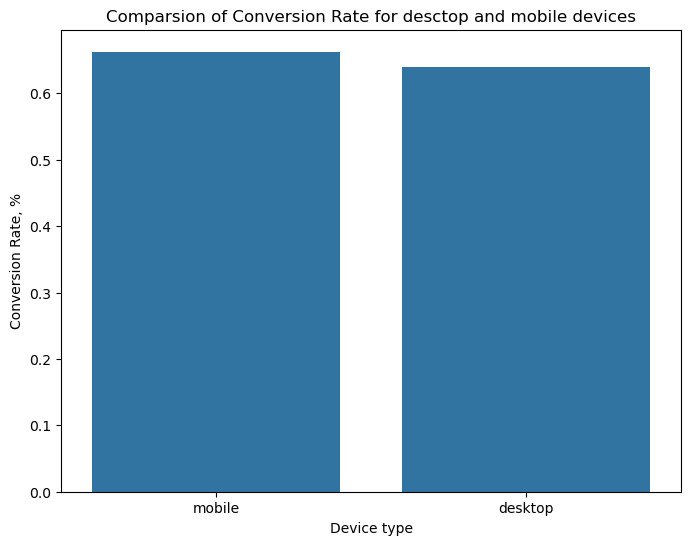

In [46]:
# Visualization of the conversion rate for desktop and mobile devices.
plt.figure(figsize=(8, 6))
sns.barplot(x='device_category', y='conversion_rate', data=filtered_data, ci=None)
plt.xlabel('Device type')
plt.ylabel('Conversion Rate, %')
plt.title('Comparsion of Conversion Rate for desctop and mobile devices')
plt.show()

### Hypothesis testing: Traffic from cities of presence (Moscow and the surrounding area, St. Petersburg) is not different from traffic from other regions in terms of CR (Conversion Rate) for target events.

**Hypothesis testing using a Z-test:**

In [47]:
# Group the data by cities of presence and calculate the average Conversion Rate.
grouped_df = merged_dataset.groupby('city_presence')['conversion_rate'].mean()

# Calculate the Conversion Rate for cities of presence and other regions.
presense_cr = grouped_df['mskreg_spb']
others_cr = grouped_df['others']

# Calculate the sample sizes for each group.
n_presense = merged_dataset['city_presence'].value_counts()['mskreg_spb']
n_others = merged_dataset['city_presence'].value_counts()['others']

# Calculate the standard errors for each group.
se_presense = (presense_cr * (1 - presense_cr) / n_presense) ** 0.5
se_others = (others_cr * (1 - others_cr) / n_others) ** 0.5

# Calculate the Z-value for the difference between proportions.
z_value = (presense_cr - others_cr) / ((se_presense ** 2 + se_others ** 2) ** 0.5)

# Check the statistical significance of the differences between proportions.
if abs(z_value) > z_critical:
    print("The difference in Conversion Rates between presence cities and other cities is statistically significant.")
else:
    print("The difference in Conversion Rates between presence cities and other cities is not statistically significant.")

The difference in Conversion Rates between presence cities and other cities is statistically significant.


**Hypothesis testing using the Chi-square method:**

In [48]:
# Create a contingency table for cities of presence and other cities.
contingency_table = pd.crosstab(merged_dataset['city_presence'], merged_dataset['conversion_rate'])

# Calculate the Chi-square statistic and p-value.
chi2, p_value, _, _ = st.chi2_contingency(contingency_table)

# Check the statistical significance of the differences between the groups.
if p_value < alpha:
    print("The difference between the Conversion Rate in cities of presence and other cities is statistically significant.")
else:
    print("The difference between the Conversion Rate in cities of presence and other cities is not statistically significant.")

The difference between the Conversion Rate in cities of presence and other cities is statistically significant.


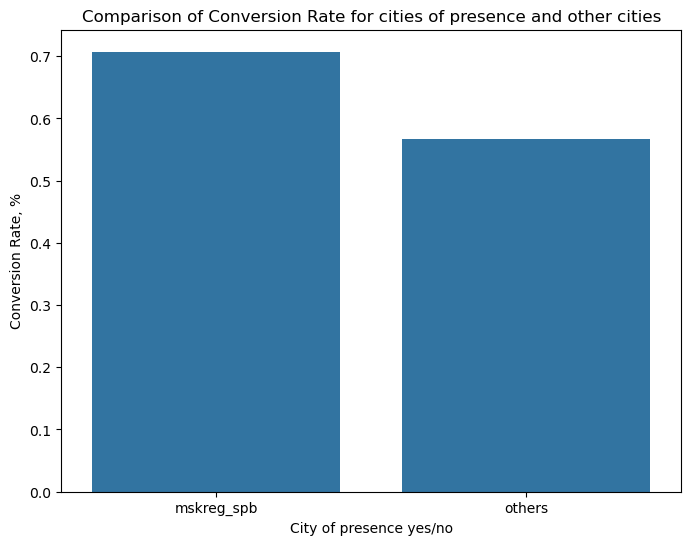

In [49]:
# Visualization of Conversion Rate from cities of presence and other cities
plt.figure(figsize=(8, 6))
sns.barplot(x='city_presence', y='conversion_rate', data=filtered_data, ci=None)
plt.xlabel('City of presence yes/no')
plt.ylabel('Conversion Rate, %')
plt.title('Comparison of Conversion Rate for cities of presence and other cities')
plt.show()

### Conclusions from hypothesis testing

All three hypotheses were tested using two different methods with a significance level of 0.05, and the following results were obtained:

1. The difference between the CR of organic traffic and the CR of paid traffic is statistically significant. The CR of organic traffic is higher than the CR of paid traffic.

2. The difference between the CR of mobile devices and the CR of desktop devices is statistically significant. The CR of mobile devices is higher than the CR of desktop devices.

3. The difference between the CR of cities of presence (Moscow and region, Saint Petersburg) and the CR of other cities is statistically significant. The conversion rate from cities of presence is higher than from other cities.

## Answers to the Product Team's Questions

**1)Identification of Sources of Target Traffic**

**Top 10 Advertising Campaigns by Traffic Volume:**

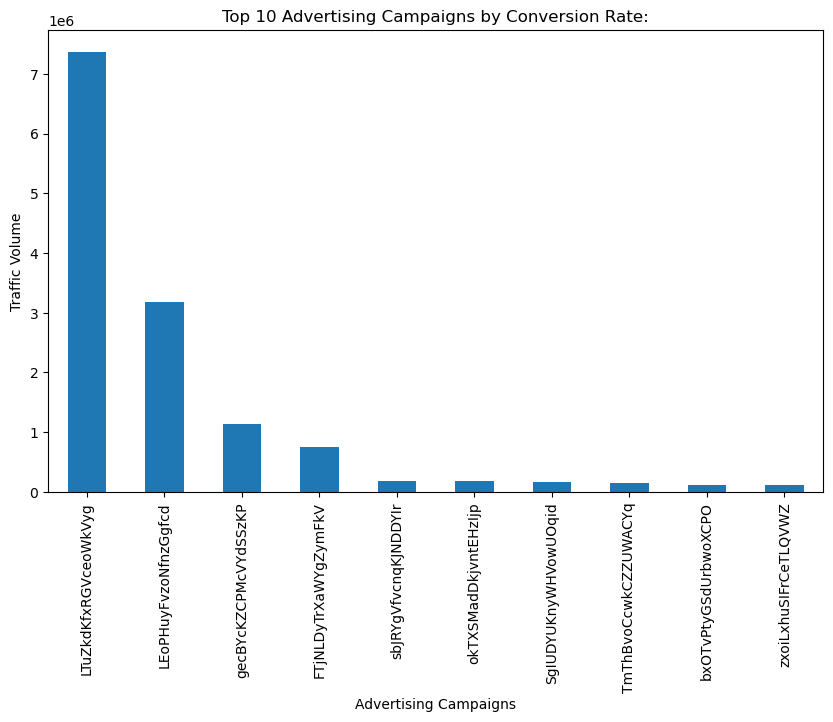

In [50]:
grouped_df_campain_traff = merged_dataset.groupby(['utm_campaign'])['client_id'].count().sort_values(ascending=False)
grouped_df_campain_traff = grouped_df_campain_traff.head(10)

plt.figure(figsize=(10, 6))
grouped_df_campain_traff.plot(kind='bar')
plt.xlabel('Advertising Campaigns')
plt.ylabel('Traffic Volume')
plt.title('Top 10 Advertising Campaigns by Conversion Rate:')
plt.show()

**Top 10 Advertise companies by Conversion rate, %:**

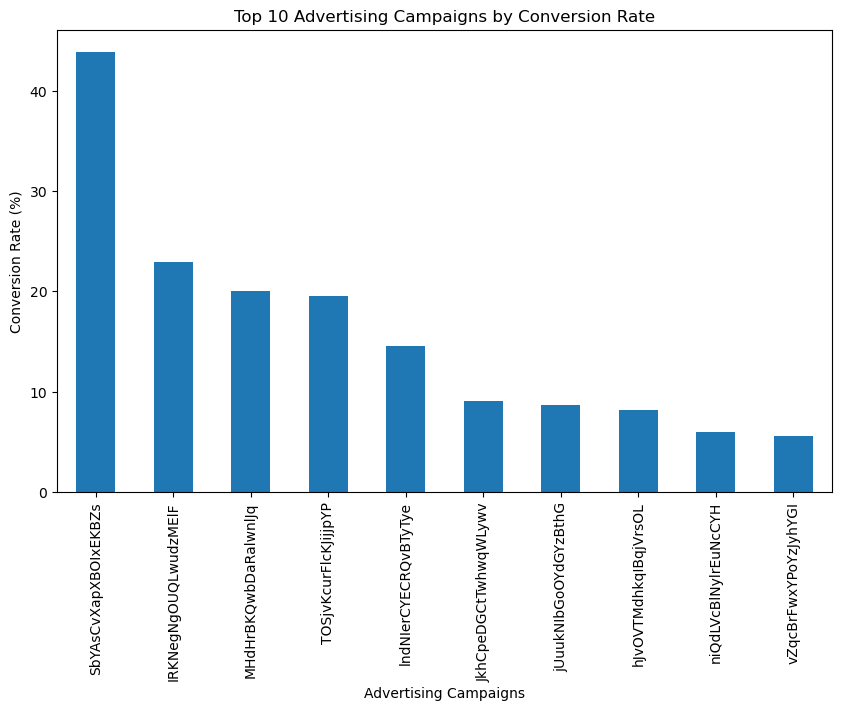

In [51]:
grouped_df_campain_cr = merged_dataset.groupby(['utm_campaign'])['conversion_rate'].mean().sort_values(ascending=False)
grouped_df_campain_cr = grouped_df_campain_cr.head(10)

plt.figure(figsize=(10, 6))
grouped_df_campain_cr.plot(kind='bar')
plt.xlabel('Advertising Campaigns')
plt.ylabel('Conversion Rate (%)')
plt.title('Top 10 Advertising Campaigns by Conversion Rate')
plt.show()

**Top 10 device brands in descending order of traffic.**

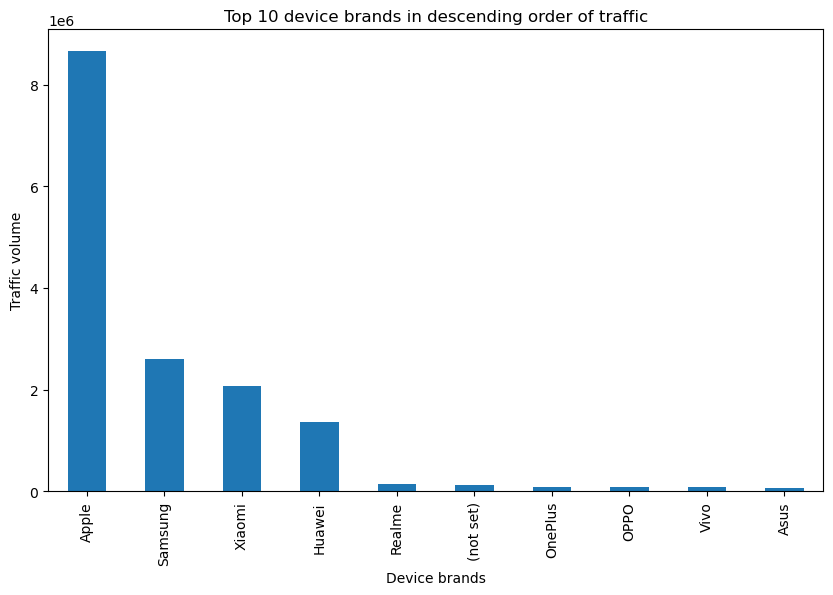

In [52]:
grouped_df_devicebrands_traff = merged_dataset.groupby(['device_brand'])['client_id'].count().sort_values(ascending=False)
grouped_df_devicebrands_traff = grouped_df_devicebrands_traff.head(10)

plt.figure(figsize=(10, 6))
grouped_df_devicebrands_traff.plot(kind='bar')
plt.xlabel('Device brands')
plt.ylabel('Traffic volume')
plt.title('Top 10 device brands in descending order of traffic')
plt.show()

**Top 10 device brands by conversion rate**

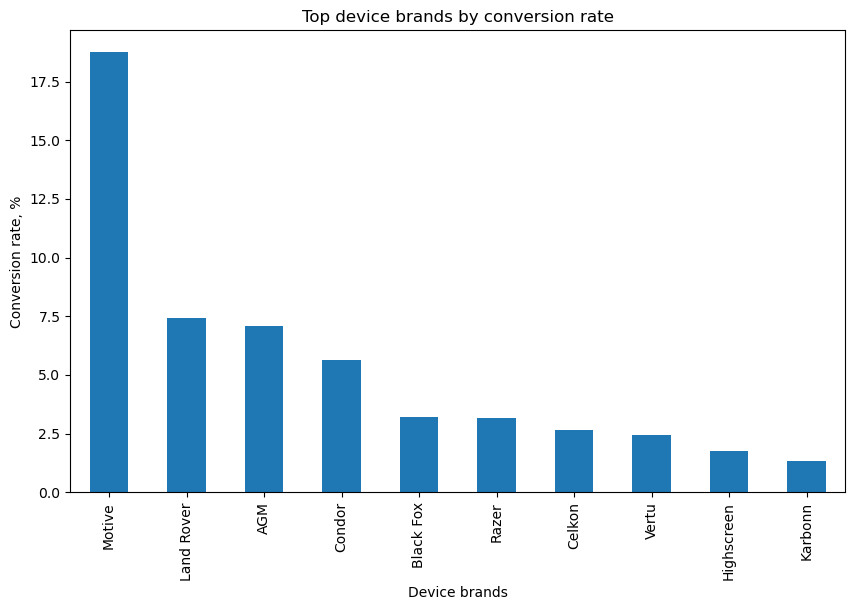

In [53]:
grouped_df_devicebrands_cr = merged_dataset.groupby(['device_brand'])['conversion_rate'].mean().sort_values(ascending=False)
grouped_df_devicebrands_cr = grouped_df_devicebrands_cr.head(10)

plt.figure(figsize=(10, 6))
grouped_df_devicebrands_cr.plot(kind='bar')
plt.xlabel('Device brands')
plt.ylabel('Conversion rate, %')
plt.title('Top device brands by conversion rate')
plt.show()

**Тop cities by traffic volume**

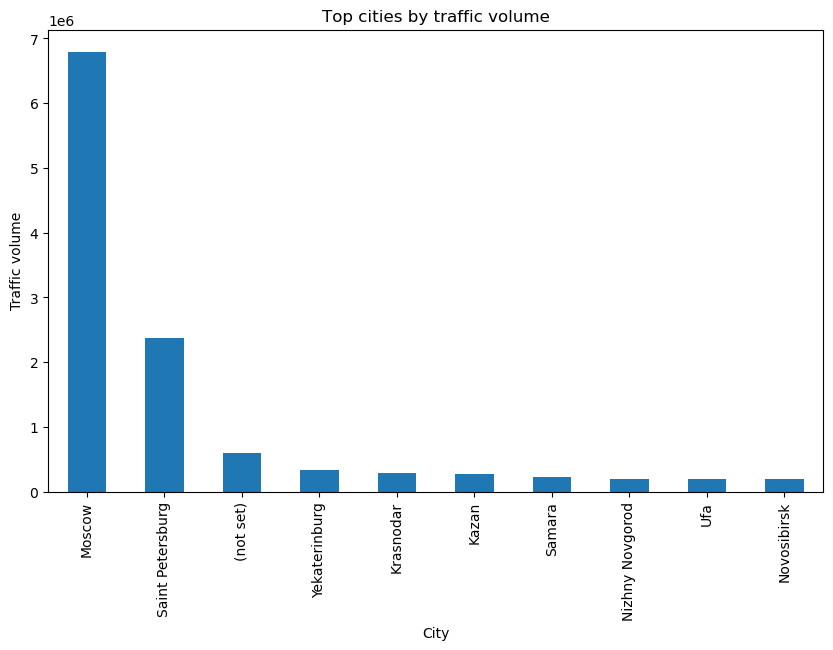

In [54]:
grouped_df_cities_traff = merged_dataset.groupby(['geo_city'])['client_id'].count().sort_values(ascending=False)
grouped_df_cities_traff = grouped_df_cities_traff.head(10)

plt.figure(figsize=(10, 6))
grouped_df_cities_traff.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Traffic volume')
plt.title('Тop cities by traffic volume')
plt.show()

**Top 10 cities in conversion rate**

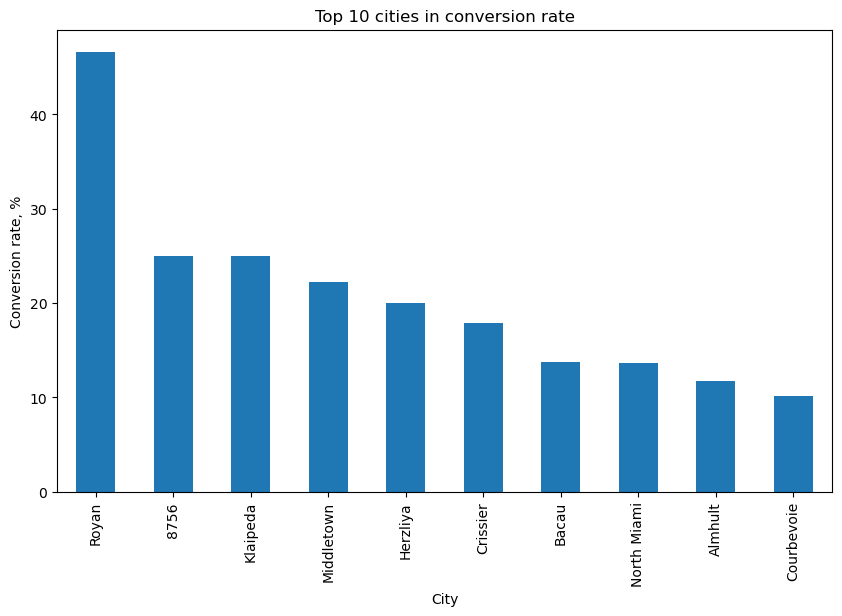

In [55]:
grouped_df_cities_cr = merged_dataset.groupby(['geo_city'])['conversion_rate'].mean().sort_values(ascending=False)
grouped_df_cities_cr = grouped_df_cities_cr.head(10)

plt.figure(figsize=(10, 6))
grouped_df_cities_cr.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Conversion rate, %')
plt.title('Top 10 cities in conversion rate')
plt.show()

**Top 10 countries by traffic volume**

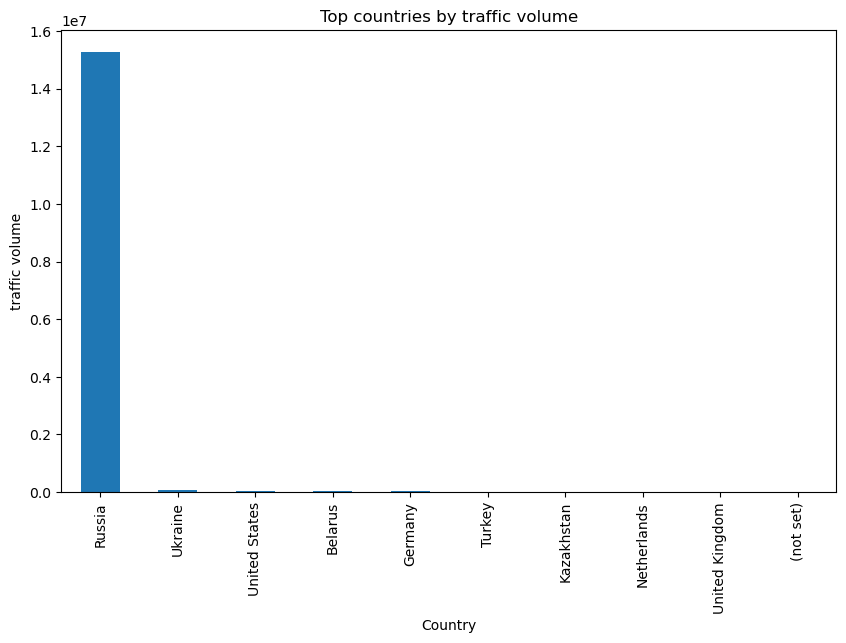

In [56]:
grouped_df_country_traff = merged_dataset.groupby(['geo_country'])['client_id'].count().sort_values(ascending=False)
grouped_df_country_traff = grouped_df_country_traff.head(10)

plt.figure(figsize=(10, 6))
grouped_df_country_traff.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('traffic volume')
plt.title('Top countries by traffic volume')
plt.show()

**Top 10 countries (excluding Russia) by traffic volume.**

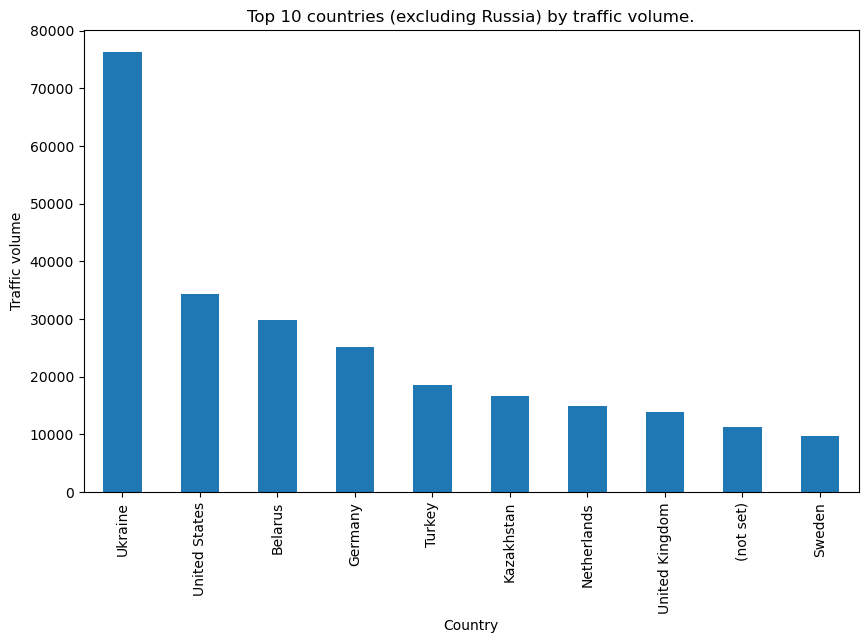

In [57]:
grouped_df_country_traff_withoutr = merged_dataset[merged_dataset['geo_country'] != 'Russia'].groupby(['geo_country'])\
['client_id'].count().sort_values(ascending=False)
grouped_df_country_traff_withoutr = grouped_df_country_traff_withoutr.head(10)

plt.figure(figsize=(10, 6))
grouped_df_country_traff_withoutr.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Traffic volume')
plt.title('Top 10 countries (excluding Russia) by traffic volume.')
plt.show()

**Top 10 countries by conversion rate.**

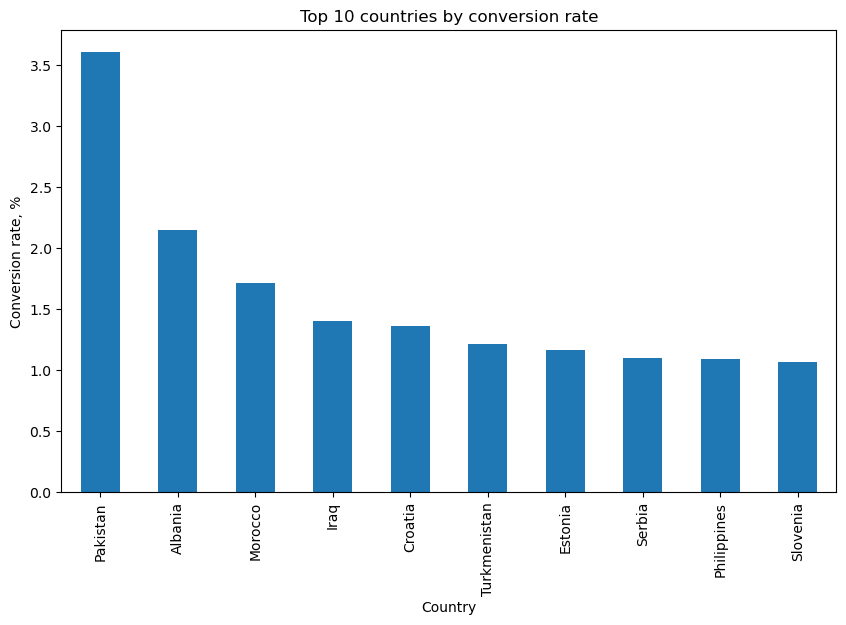

In [58]:
grouped_df_country_cr = merged_dataset.groupby(['geo_country'])['conversion_rate'].mean().sort_values(ascending=False)
grouped_df_country_cr = grouped_df_country_cr.head(10)

plt.figure(figsize=(10, 6))
grouped_df_country_cr.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Conversion rate, %')
plt.title('Top 10 countries by conversion rate')
plt.show()

**2) Determining the most in-demand car models and those with the highest conversion rate**

**Top 10 car models with the highest traffic**

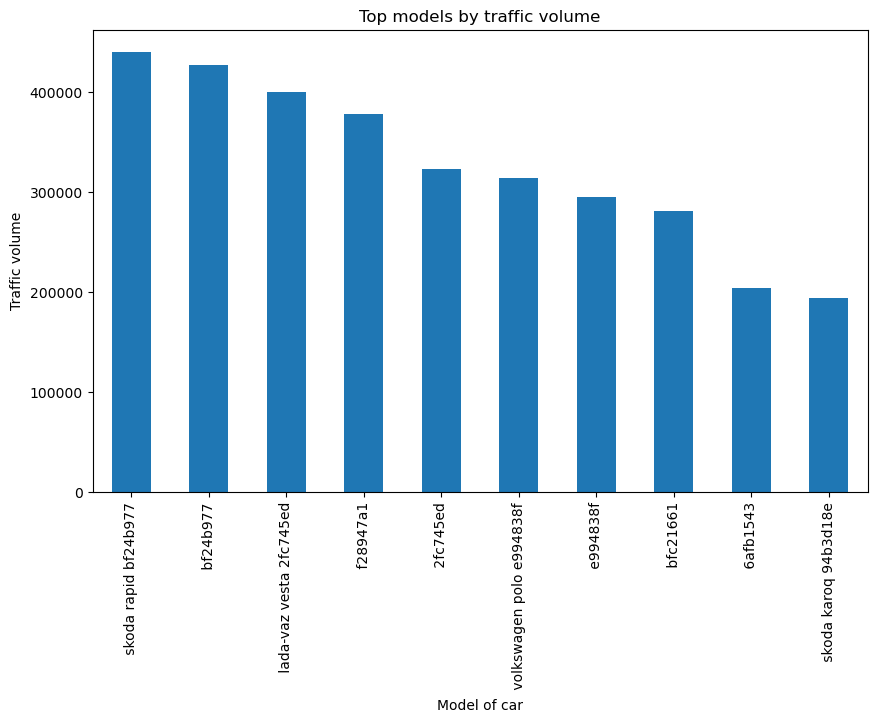

In [59]:
grouped_df_cars_traff = merged_dataset[merged_dataset['car_info'] != 'other page'].groupby(['car_info'])\
['client_id'].count().sort_values(ascending=False)
grouped_df_cars_traff = grouped_df_cars_traff[~grouped_df_cars_traff.index.str.contains('podpiska')].head(10)

plt.figure(figsize=(10, 6))
grouped_df_cars_traff.plot(kind='bar')
plt.xlabel('Model of car')
plt.ylabel('Traffic volume')
plt.title('Top models by traffic volume')
plt.show()

**Top 10 cars with the highest number of conversions**

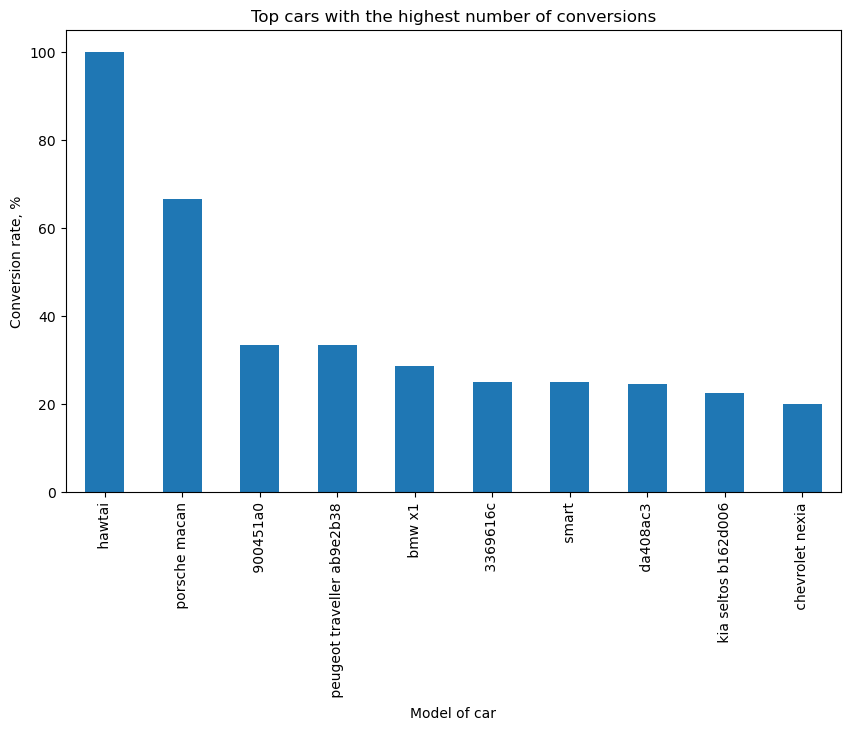

In [60]:
grouped_df_cars_cr = merged_dataset[merged_dataset['car_info'] != 'other page'].groupby(['car_info'])\
['conversion_rate'].mean().sort_values(ascending=False)
grouped_df_cars_cr = grouped_df_cars_cr[~grouped_df_cars_cr.index.str.contains('podpiska')].head(10)

plt.figure(figsize=(10, 6))
grouped_df_cars_cr.plot(kind='bar')
plt.xlabel('Model of car')
plt.ylabel('Conversion rate, %')
plt.title('Top cars with the highest number of conversions')
plt.show()

**3) Determining the potential of social networks for scaling advertising**

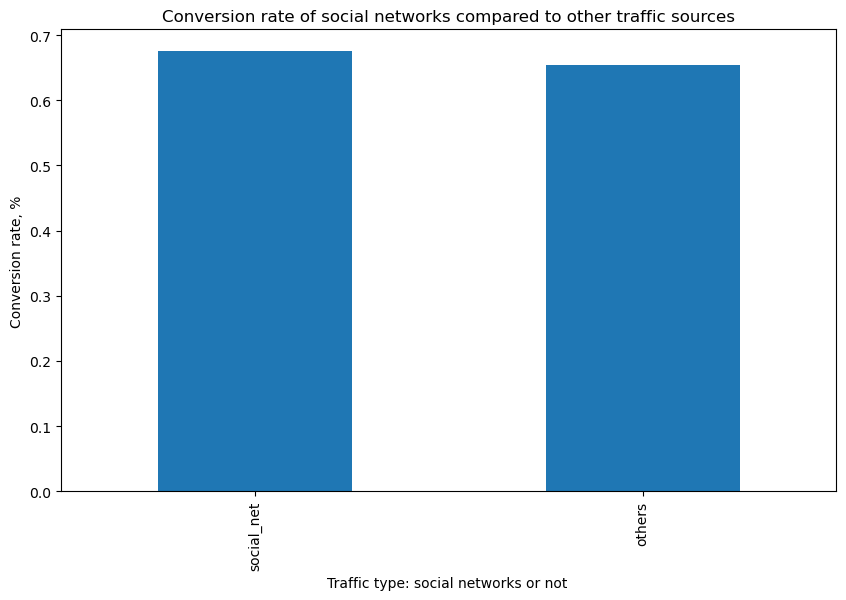

In [61]:
# Коэффициент конверсии соцсетей по сравнению с другими источниками трафика
grouped_df_social_and_others_cr = merged_dataset.groupby(['social'])['conversion_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
grouped_df_social_and_others_cr.plot(kind='bar')
plt.xlabel('Traffic type: social networks or not ')
plt.ylabel('Conversion rate, %')
plt.title('Conversion rate of social networks compared to other traffic sources')
plt.show()

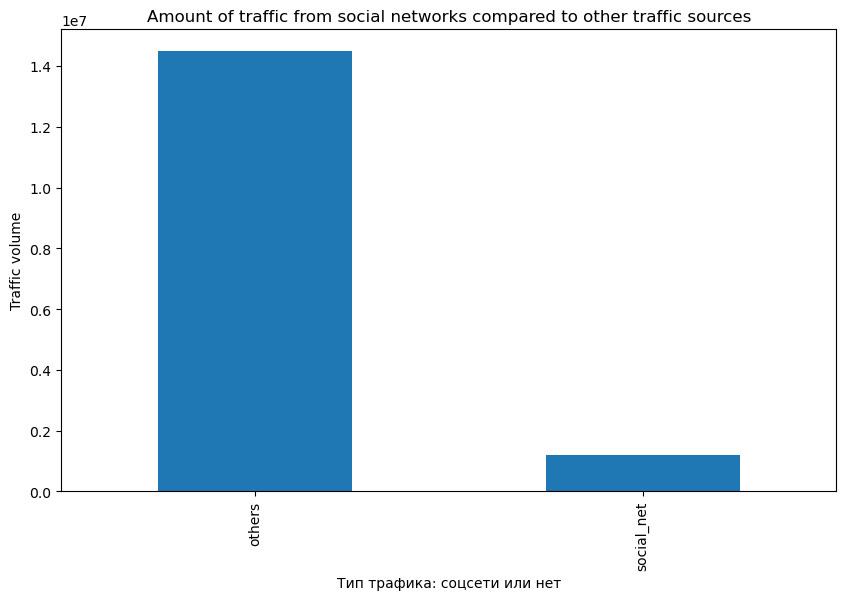

In [62]:
# Количество трафика соцсетей по сравнению с другими источниками трафика:
grouped_df_social_and_others_traff = merged_dataset.groupby(['social'])['client_id'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
grouped_df_social_and_others_traff.plot(kind='bar')
plt.xlabel('Тип трафика: соцсети или нет')
plt.ylabel('Traffic volume')
plt.title('Amount of traffic from social networks compared to other traffic sources')
plt.show()

## Conclusion

The conversion rate from social networks is 0.02% higher than the conversion rate from other traffic sources. However, the amount of traffic from social networks is 10 times smaller compared to other traffic sources.  
Social networks have good potential, and it is advisable to increase traffic through SMM promotion and targeted advertising.